In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-philippe re
cobija bo
dubrovnik hr
qaanaaq gl
farafangana mg
belushya guba ru
busselton au
marsh harbour bs
kasongo-lunda cd
codrington ag
homer us
hami cn
kapaa us
mamlyutka kz
cape town za
ilhabela br
attawapiskat ca
albany au
penzance gb
nioro ml
albany au
molepolole bw
saint-joseph re
chowchilla us
rikitea pf
bandarbeyla so
ushuaia ar
ostrovnoy ru
butaritari ki
coihaique cl
kapaa us
vostok ru
bathsheba bb
cantapoy ph
saint george bm
barrow us
punta arenas cl
belushya guba ru
solhan tr
hobart au
bluff nz
new norfolk au
rikitea pf
georgetown sh
stange no
new norfolk au
aykhal ru
bluff nz
jamestown sh
saint-philippe re
mataura pf
rikitea pf
illoqqortoormiut gl
puerto ayora ec
taolanaro mg
cherskiy ru
ushuaia ar
bethel us
kodiak us
mar del plata ar
busselton au
lata sb
victor harbor au
carnarvon au
leningradskiy ru
coquimbo cl
deputatskiy ru
hithadhoo mv
zaozerne ua
nizhneyansk ru
maniitsoq gl
kirakira sb
severo-kurilsk ru
ushuaia ar
bahce tr
illoqqortoormiut gl
ribeira grande pt

rikitea pf
bambous virieux mu
rikitea pf
hilo us
namibe ao
castro cl
mar del plata ar
hobart au
chuy uy
nikolskoye ru
aron in
pisco pe
rikitea pf
faanui pf
illoqqortoormiut gl
purbalingga id
nuuk gl
sao filipe cv
sena madureira br
illoqqortoormiut gl
kapaa us
rikitea pf
portland au
sembe cg
mahon es
kaitangata nz
georgetown sh
albany au
karauzyak uz
mount isa au
ushuaia ar
ushuaia ar
leh in
passo de camaragibe br
bluff nz
taolanaro mg
new norfolk au
nizhneyansk ru
provideniya ru
rikitea pf
funadhoo mv
rikitea pf
castro cl
kaitangata nz
mataura pf
vaini to
alugan ph
verkhnyaya toyma ru
yellowknife ca
jamestown sh
ribeira grande pt
ushuaia ar
jamestown sh
puerto ayora ec
harper lr
buala sb
avarua ck
arraial do cabo br
tunduru tz
paulo ramos br
fairbanks us
norman wells ca
vila franca do campo pt
hermanus za
olenegorsk ru
sembe cg
carnarvon au
ilebo cd
aras no
bethel us
haines junction ca
mareeba au
longlac ca
cururupu br
kaihua cn
vao nc
codrington ag
busselton au
puerto ayora ec
sompeta

avarua ck
naze jp
albany au
katsuura jp
prado br
east london za
tias es
mezen ru
kurumkan ru
albany au
beamsville ca


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import OpenWeather_API_KEY

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + OpenWeather_API_KEY
# print(url)

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Next, we need to iterate through our list of cities and begin building the URL for each city, 
# while grouping our records in sets of 50. 
# To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. 
# Once we get to 50, we tell the program to pause for 60 seconds using the time.sleep(60) command. 
# The OpenWeatherMap API only allows 60 calls for per minute on their free tier, 
# so pausing our program for one minute after each set of 50 will prevent time-out errors. 
# We can also retrieve the city from the cities list and add it to the city_url by using indexing, 
# as shown in the following code:

In [12]:
# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
# If the statement is true, then the set_count and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. 
# However, we are removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). 
# This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | cobija
Processing Record 3 of Set 1 | dubrovnik
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | farafangana
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | marsh harbour
Processing Record 9 of Set 1 | kasongo-lunda
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | homer
Processing Record 12 of Set 1 | hami
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | mamlyutka
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | ilhabela
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | penzance
Processing Record 20 of Set 1 | nioro
Processing Record 21 of Set 1 | molepolole
Processing Rec

Processing Record 36 of Set 4 | isangel
Processing Record 37 of Set 4 | jutai
Processing Record 38 of Set 4 | lillesand
Processing Record 39 of Set 4 | gambela
Processing Record 40 of Set 4 | teacapan
Processing Record 41 of Set 4 | cidreira
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | vigrestad
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | paradwip
City not found. Skipping...
Processing Record 46 of Set 4 | ariquemes
Processing Record 47 of Set 4 | hamada
Processing Record 48 of Set 4 | tautira
Processing Record 49 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 50 of Set 4 | salamiyah
Processing Record 1 of Set 5 | zhanatas
City not found. Skipping...
Processing Record 2 of Set 5 | odweyne
Processing Record 3 of Set 5 | skibbereen
Processing Record 4 of Set 5 | north platte
Processing Record 5 of Set 5 | bubaque
Processing Record 6 of Set 5 | venado tuerto
Processing Record 7 of Set 5 | beloha
Processing Recor

Processing Record 23 of Set 8 | aron
Processing Record 24 of Set 8 | faanui
Processing Record 25 of Set 8 | purbalingga
Processing Record 26 of Set 8 | nuuk
Processing Record 27 of Set 8 | sena madureira
Processing Record 28 of Set 8 | portland
Processing Record 29 of Set 8 | sembe
Processing Record 30 of Set 8 | mahon
Processing Record 31 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 32 of Set 8 | passo de camaragibe
Processing Record 33 of Set 8 | funadhoo
Processing Record 34 of Set 8 | alugan
Processing Record 35 of Set 8 | verkhnyaya toyma
Processing Record 36 of Set 8 | harper
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | tunduru
City not found. Skipping...
Processing Record 39 of Set 8 | paulo ramos
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | olenegorsk
Processing Record 42 of Set 8 | aras
Processing Record 43 of Set 8 | haines junction
Processing Record 44 of Set 8 | mareeba
Processing Record 

Processing Record 12 of Set 12 | duliby
Processing Record 13 of Set 12 | port-gentil
Processing Record 14 of Set 12 | avera
Processing Record 15 of Set 12 | oriximina
Processing Record 16 of Set 12 | borama
City not found. Skipping...
Processing Record 17 of Set 12 | kununurra
Processing Record 18 of Set 12 | gdov
Processing Record 19 of Set 12 | eydhafushi
Processing Record 20 of Set 12 | medvedevo
Processing Record 21 of Set 12 | danbury
Processing Record 22 of Set 12 | lichinga
Processing Record 23 of Set 12 | balimo
City not found. Skipping...
Processing Record 24 of Set 12 | leskovik
Processing Record 25 of Set 12 | praia da vitoria
Processing Record 26 of Set 12 | havre-saint-pierre
Processing Record 27 of Set 12 | pierre
Processing Record 28 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 29 of Set 12 | grindavik
Processing Record 30 of Set 12 | yomitan
City not found. Skipping...
Processing Record 31 of Set 12 | gushikawa
Processing Record 32 of Set 12 | t

In [14]:
# # Run an API request for each of the cities.
# try:
    
#         # Parse the JSON and retrieve data.
#     city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#     city_lat = city_weather["coord"]["lat"]
#     city_lng = city_weather["coord"]["lon"]
#     city_max_temp = city_weather["main"]["temp_max"]
#     city_humidity = city_weather["main"]["humidity"]
#     city_clouds = city_weather["clouds"]["all"]
#     city_wind = city_weather["wind"]["speed"]
#     city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#     city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#     city_data.append({"City": city.title(),
#                     "Lat": city_lat,
#                     "Lng": city_lng,
#                     "Max Temp": city_max_temp,
#                     "Humidity": city_humidity,
#                     "Cloudiness": city_clouds,
#                     "Wind Speed": city_wind,
#                     "Country": city_country,
#                     "Date": city_date})

# # If an error is experienced, skip the city.
# except:
#     print("City not found. Skipping...")
# pass

# # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [15]:
len(city_data)

579

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,78.39,93,100,36.15,RE,2022-02-03 02:36:21
1,Cobija,-11.0267,-68.7692,71.67,99,96,2.17,BO,2022-02-03 02:36:21
2,Dubrovnik,42.6481,18.0922,46.04,39,0,11.50,HR,2022-02-03 02:36:22
3,Qaanaaq,77.4840,-69.3632,-10.59,81,100,6.80,GL,2022-02-03 02:36:22
4,Farafangana,-22.8167,47.8333,73.40,81,30,6.46,MG,2022-02-03 02:36:23
5,Busselton,-33.6500,115.3333,83.80,33,84,10.67,AU,2022-02-03 02:36:23
6,Marsh Harbour,26.5412,-77.0636,71.08,71,57,20.94,BS,2022-02-03 02:35:29
7,Kasongo-Lunda,-6.4667,16.8167,69.22,98,100,1.23,CD,2022-02-03 02:36:24
8,Codrington,-38.2667,141.9667,62.78,58,99,17.02,AU,2022-02-03 02:36:24
9,Homer,59.6425,-151.5483,31.77,83,0,8.05,US,2022-02-03 02:31:38


In [17]:
test_city_df = city_data_df
test_city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,78.39,93,100,36.15,RE,2022-02-03 02:36:21
1,Cobija,-11.0267,-68.7692,71.67,99,96,2.17,BO,2022-02-03 02:36:21
2,Dubrovnik,42.6481,18.0922,46.04,39,0,11.50,HR,2022-02-03 02:36:22
3,Qaanaaq,77.4840,-69.3632,-10.59,81,100,6.80,GL,2022-02-03 02:36:22
4,Farafangana,-22.8167,47.8333,73.40,81,30,6.46,MG,2022-02-03 02:36:23
5,Busselton,-33.6500,115.3333,83.80,33,84,10.67,AU,2022-02-03 02:36:23
6,Marsh Harbour,26.5412,-77.0636,71.08,71,57,20.94,BS,2022-02-03 02:35:29
7,Kasongo-Lunda,-6.4667,16.8167,69.22,98,100,1.23,CD,2022-02-03 02:36:24
8,Codrington,-38.2667,141.9667,62.78,58,99,17.02,AU,2022-02-03 02:36:24
9,Homer,59.6425,-151.5483,31.77,83,0,8.05,US,2022-02-03 02:31:38


In [18]:
new_column_order = ["City", "Country", "Date", "Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-02-03 02:36:21,-21.3585,55.7679,78.39,93,100,36.15
1,Cobija,BO,2022-02-03 02:36:21,-11.0267,-68.7692,71.67,99,96,2.17
2,Dubrovnik,HR,2022-02-03 02:36:22,42.6481,18.0922,46.04,39,0,11.50
3,Qaanaaq,GL,2022-02-03 02:36:22,77.4840,-69.3632,-10.59,81,100,6.80
4,Farafangana,MG,2022-02-03 02:36:23,-22.8167,47.8333,73.40,81,30,6.46
5,Busselton,AU,2022-02-03 02:36:23,-33.6500,115.3333,83.80,33,84,10.67
6,Marsh Harbour,BS,2022-02-03 02:35:29,26.5412,-77.0636,71.08,71,57,20.94
7,Kasongo-Lunda,CD,2022-02-03 02:36:24,-6.4667,16.8167,69.22,98,100,1.23
8,Codrington,AU,2022-02-03 02:36:24,-38.2667,141.9667,62.78,58,99,17.02
9,Homer,US,2022-02-03 02:31:38,59.6425,-151.5483,31.77,83,0,8.05


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

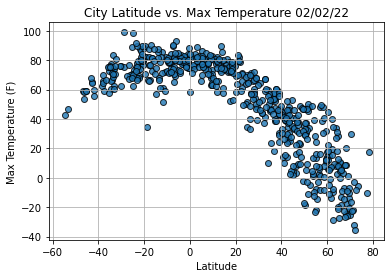

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

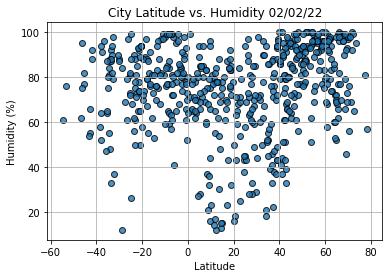

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

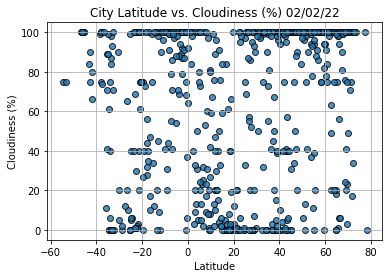

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

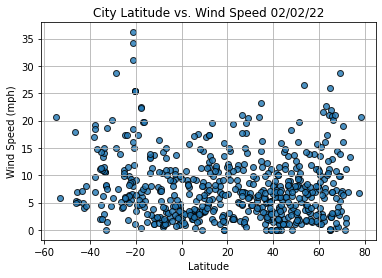

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

# If we run this code, there will be no output until we call the funciton with five parameters. 
# We need to call the function with the correct number of parameters or arguments for the functions.

In [28]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-02-03 02:35:02
Lat                      -33.9258
Lng                       18.4232
Max Temp                    66.61
Humidity                       87
Cloudiness                     40
Wind Speed                    3.0
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
574    False
575     True
576     True
577     True
578     True
Name: Lat, Length: 579, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Dubrovnik,HR,2022-02-03 02:36:22,42.6481,18.0922,46.04,39,0,11.50
3,Qaanaaq,GL,2022-02-03 02:36:22,77.4840,-69.3632,-10.59,81,100,6.80
6,Marsh Harbour,BS,2022-02-03 02:35:29,26.5412,-77.0636,71.08,71,57,20.94
9,Homer,US,2022-02-03 02:31:38,59.6425,-151.5483,31.77,83,0,8.05
10,Hami,CN,2022-02-03 02:36:25,42.8000,93.4500,24.85,33,95,1.28
...,...,...,...,...,...,...,...,...,...
572,San Alberto,CO,2022-02-03 02:52:33,7.7611,-73.3922,77.85,59,23,2.91
575,Tias,ES,2022-02-03 02:52:33,28.9611,-13.6450,67.68,49,93,5.75
576,Mezen,RU,2022-02-03 02:52:34,65.8522,44.2400,5.47,98,94,3.18
577,Kurumkan,RU,2022-02-03 02:52:34,54.3000,110.3000,-12.19,96,78,1.74


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

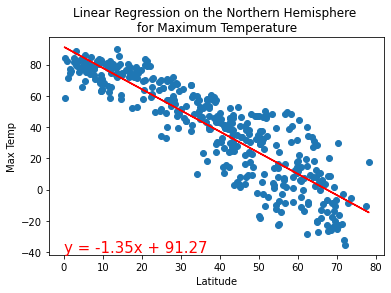

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,-40))

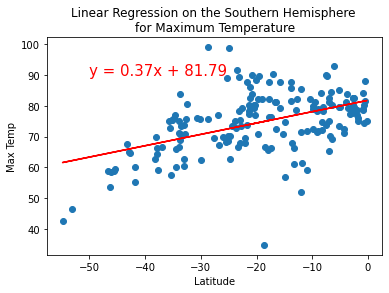

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

In [34]:
# This means that as we approach the equator, 0 lattitude, the temperatures be becomes warmer. 
# When we are further from the equator the temperatures become cooler.

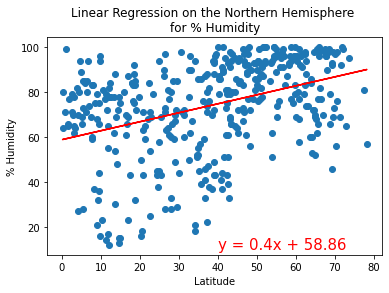

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

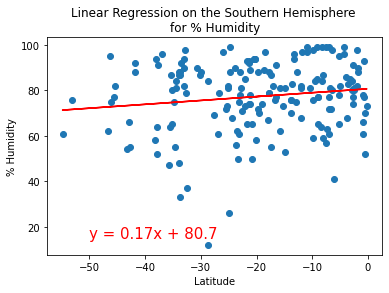

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

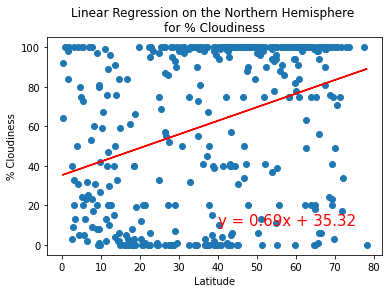

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

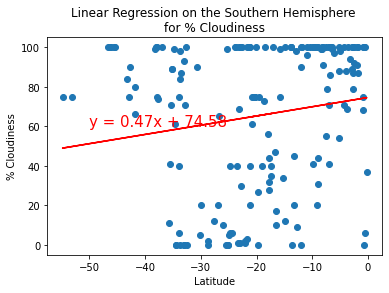

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

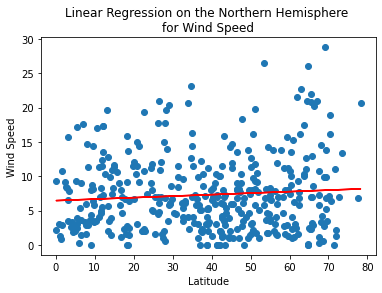

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

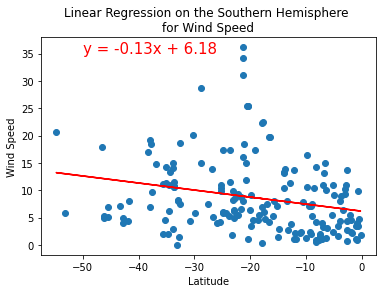

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))